# Linear Regression

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#### Ignore Warnings

In [349]:
import warnings
warnings.simplefilter("ignore")

#### Load Data

In [350]:
df_X, df_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

#### View Data

In [351]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [352]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [353]:
df_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

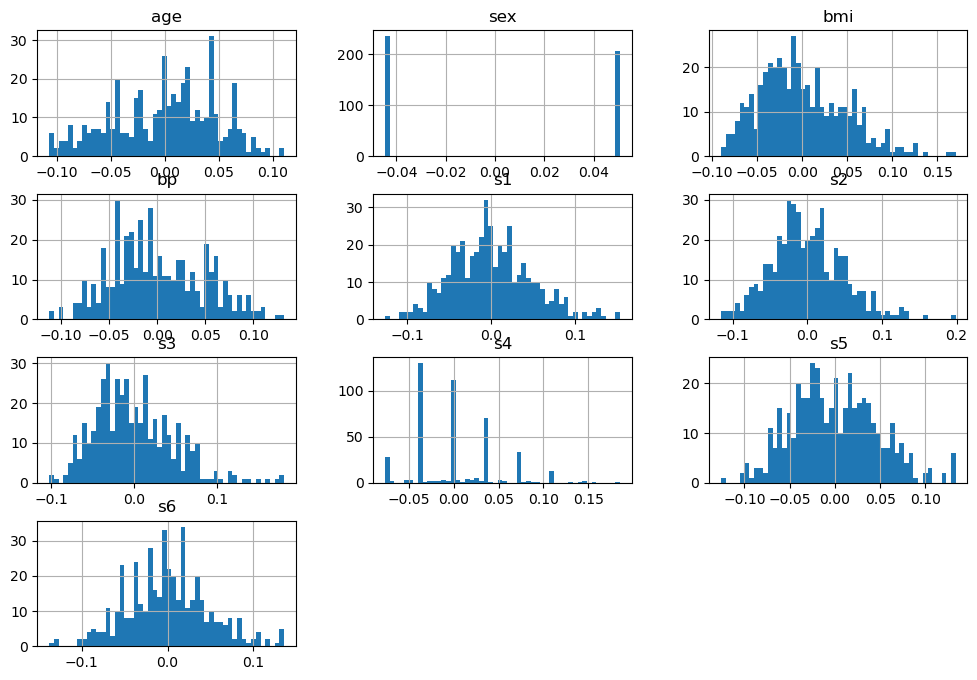

In [354]:
df_X.hist(bins=50, figsize=(12,8))
plt.show()

In [355]:
df_X["sex"] = df_X['sex'].apply(lambda x: 1 if x > 0 else 0)

In [356]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [357]:
df_X.corrwith(df_y)

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441482
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
dtype: float64

In [358]:
# df_X = df_X.drop(["sex"], axis=1)
df_X = df_X[["bmi", "bp", "s5"]].copy()

In [359]:
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.075, random_state=9)

In [360]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [361]:
score = model.score(x_test, y_test)
print(f"Score - {round(score, 2)} ({score})")

Score - 0.68 (0.6844351769954623)


In [362]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [363]:
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error: {round(mse, 2)}")
print(f"Coefficients of determination: {round(r2, 2)}")

Coefficients: [562.99078074 274.69992313 559.61162807]
Mean Squared Error: 2199.86
Coefficients of determination: 0.68


In [369]:
x_test.shape

(34, 3)

In [370]:
y_test.shape

(34,)

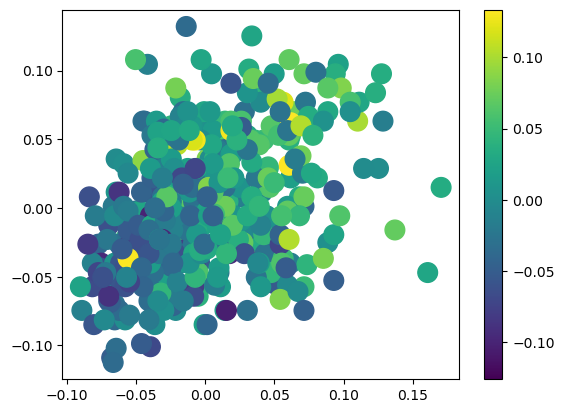

In [373]:
fig, ax = plt.subplots()
scat = ax.scatter(df_X.iloc[:, 0], df_X.iloc[:, 1], c=df_X.iloc[:, 2], s=200, marker='o')
fig.colorbar(scat)
plt.show()

In [375]:
df_X

,bmi,bp,s5
0,0.061696,0.021872,0.019907
1,-0.051474,-0.026328,-0.068332
2,0.044451,-0.005670,0.002861
3,-0.011595,-0.036656,0.022688
4,-0.036385,0.021872,-0.031988
...,...,...,...
437,0.019662,0.059744,0.031193
438,-0.015906,-0.067642,-0.018114
439,-0.015906,0.017293,-0.046883
440,0.039062,0.001215,0.044529


<function matplotlib.pyplot.show(close=None, block=None)>

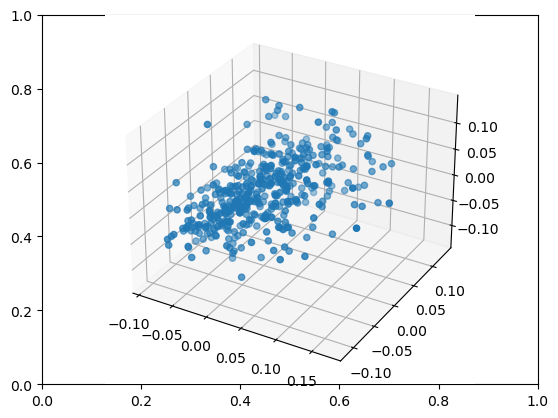

In [377]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_X.iloc[:, 0], df_X.iloc[:, 1], df_X.iloc[:, 2])
plt.show